# EECS 465/ROB 422: Introduction to Algorithmic Robotics Fall 2024  
# Homework Assignment #2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Questions
1. (5 points) Is a single point convex? Use the definition of convexity to justify your nswer.

2. (10 points) Is the function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ convex? Use the principles of composition and the common convex functions shown in the lecture to justify your answer.

Yes. The function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ is convex. 
To see this, we can use the following steps:
1. The function is a composition of two convex functions: $|2 − 5x|$, $2x$, and $8e^{(−4x)}$.
2. $|2 − 5x|$ is convex  because it forms a V-shape and $8e^{(−4x)}$ is convex a function because its second derivative is positive.
3. $2x$ is a convex function(a line is both convex and concave) and +1 is a constant function.
4. Therefore, the function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ is convex.

Yes, a single point is convex. 
The definition of convexity states that a set of points is convex if for any two points $p$ and $q$ in the set, the line segment connecting them is also in the set. 
In other words, the set of points is convex if the line connecting any two points in the set is also in the set. 

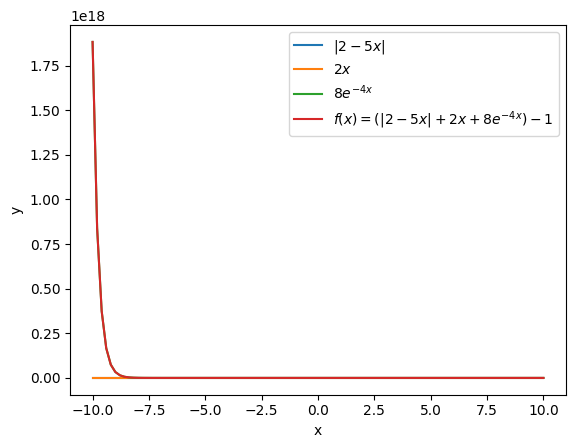

In [2]:
# Plotting the function
x = np.linspace(-10, 10, 100)
y_1 = np.abs(2 - 5*x)
plt.plot(x, y_1, label='$|2 - 5x|$')
y_2 = 2*x
plt.plot(x, y_2, label='$2x$')
y_3 = 8*np.exp(-4*x)
plt.plot(x, y_3, label='$8e^{-4x}$')
y_4 = y_1 + y_2 + y_3 - 1
plt.plot(x, y_4, label='$f(x) = (|2 - 5x| + 2x + 8e^{-4x}) - 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();


3. (10 points) Rewrite the following optimization problem in standard form $(x = [x1,x2]^T)$:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &-4x_2 + 3x_1 - 3\\
\text{subject to} \quad &x_2 \leq -3 \\ 
 &-x_1 - 2 \geq x_1 - 5x_2 \\ 
 &x_2 + 6.3 = x_1 \\ 
 &-x_2 + 5 + 5x_1 \leq 4x_1
\end{aligned}$$

The standard form of an optimization problem is as follows: 
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &f(x) \\ 
 \text{subject to} \quad &g_i(x) \leq 0, i = 1,2,...,m \\ 
 &h_j(x) = 0, j = 1,2,...,p
\end{aligned}$$
where $f(x)$ is the objective function, $g_i(x)$ are the inequality constraints, and $h_j(x)$ are the equality constraints.

$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &-4x_2 + 3x_1 - 3\\
\text{subject to} \quad &x_2 + 3 \leq 0 \\ 
 &2x_1 - 5x_2 + 2 \leq 0  \\ 
 &-x_1 + x_2 + 6.3 = 0 \\ 
 &-x_2 + 5 \leq 0
\end{aligned}$$

4. (15 points) Consider $f(x) = max\{3x^2 − 2, 2x − 1\}$. At what value(s) of $x$ will the subdifferential $δf(x)$ contain more than one subgradient? What is $δf (x)$ at each such $x$ value?

The subdifferential $δf(x)$ of $f(x) = max\{3x^2 − 2, 2x − 1\}$ is given by:
$$\begin{aligned}
δf(x) &= \begin{cases}
6x & \text{ if } 3x^2 - 2 > 2x - 1 \\
2 & \text{ if } 3x^2 - 2 \leq 2x - 1
\end{cases}
\end{aligned}$$
which is:  
$$
\begin{aligned}
f(x) = \begin{cases}
6x & \text{ if } x < -\frac{1}{3} \\
2 & \text{ if } -\frac{1}{3} \leq x \leq 1 \\
6x & \text{ if } x > 1
\end{cases}
\end{aligned}
$$
The subdifferential $δf(x)$ will contain more than one subgradient at $x = -\frac{1}{3}$ and $x = 1$.
At the points $x = -\frac{1}{3}$ and $x = 1$ the two functions are equal, meaning the maximum is achieved by both functions at the same time.  

1. At $x = -\frac{1}{3}$, the subdifferential $δf(x)$ is $g(1) = 6x = 6 \cdot (-\frac{1}{3}) = -2$ and $g(2) = 2$, so the subgradient is $[-2, 2]$
2. At $x = 1$, the subdifferential $δf(x)$ is $g(2) = 6x = 6 \cdot (1) = 6$, and $g(2) = 2$ so the subgradient is $[2, 6]$

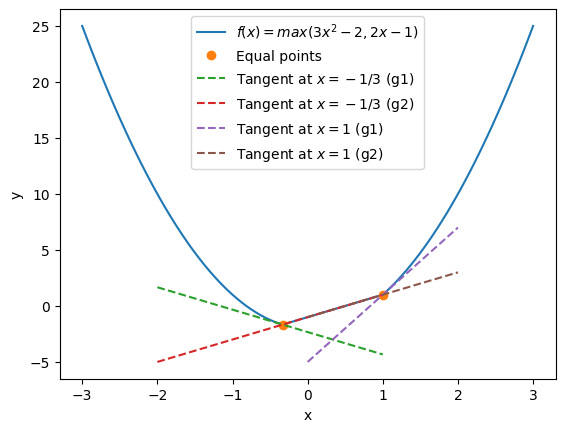

In [3]:
# Define the functions
x = np.linspace(-3, 3, 100)
y = np.maximum(3*x**2 - 2, 2*x - 1)
# Intersection points
points = np.array([[-1/3, -5/3],[1, 1]])
# Slopes at the intersection points
g1_prime_at_minus_1_3 = 6*(-1/3)
g2_prime_at_minus_1_3 = 2
g1_prime_at_1 = 6*1
g2_prime_at_1 = 2

# Define tangent lines at x = -1/3 and x = 1
def tangent_line(x, x0, y0, slope):
    return slope * (x - x0) + y0
# Create the plot
plt.plot(x, y, label='$f(x) = max(3x^2 - 2, 2x - 1)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Plot the intersection points
plt.plot(points[:,0], points[:,1], 'o', label='Equal points')

# Plot tangent lines at x = -1/3
x_tangent = np.linspace(-2, 1, 100)
plt.plot(x_tangent, tangent_line(x_tangent, -1/3, -5/3, g1_prime_at_minus_1_3), '--', label="Tangent at $x = -1/3$ (g1)")
plt.plot(x_tangent, tangent_line(x_tangent, -1/3, -5/3, g2_prime_at_minus_1_3), '--', label="Tangent at $x = -1/3$ (g2)")
# Plot tangent lines at x = 1
x_tangent = np.linspace(0, 2, 100)
plt.plot(x_tangent, tangent_line(x_tangent, 1, 1, g1_prime_at_1), '--', label="Tangent at $x = 1$ (g1)")
plt.plot(x_tangent, tangent_line(x_tangent, 1, 1, g2_prime_at_1), '--', label="Tangent at $x = 1$ (g2)")

# Show the plot
plt.legend()
plt.show()



5. A linear program is defined as:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &c^Tx \\ 
\text{subject to} \quad &Gx \leq h \\ 
&Ax = b \\ 
\end{aligned}$$

a. (10 points) Write down the Lagrange dual function for this problem and define the variables.
b. (5 points) Write down the dual problem for this $LP$.
c. (5 points) Suppose you solved the dual problem and obtained an optimal value $d_*$. Assuming the primal is feasible and bounded, how does $d_*$ relate to the solution of the primal problem $p_*$? Explain why.

a. First we apply lagrange multipliers in the primal problem 
$$L(x, \lambda, \gamma) = c^Tx - \lambda (Gx-h) + \gamma (Ax-b) $$
where $\lambda$ and $\gamma$ are the Lagrange multipliers.
Then we get the lagrange dual function:
$$g(\lambda, \gamma) = \underset{x \in D}{\text{inf}} L(x, \lambda, \gamma)$$
$$  =\underset{x \in D}{\text{inf}} (c^Tx - \lambda (Gx-h) + \gamma (Ax-b)) $$

b. The dual problem for this $LP$ is:
$$\begin{aligned}
\underset{\lambda, \gamma}{\text {minimize}} \quad &g(\lambda, \gamma) \\ 
\text{subject to} \quad &\lambda \geq 0 \\ 
\end{aligned}$$

c. $d_* \leq p_*$ which is the optimal value of the dual problem is less than or equal to the optimal value of the primal problem. 
This is because the dual problem is a minimization problem, and the optimal value of the dual problem is the minimum of the objective function $g(\lambda, \gamma)$ over all feasible values of $\lambda$ and $\gamma$. Therefore, if the primal problem is feasible and bounded, then the dual problem is also feasible and bounded, and the optimal value of the dual problem is less than or equal to the optimal value of the primal problem.

$$A(x) = \underset{\lambda, \gamma}{\text{max}} L(x, \lambda, \gamma) \geq L(x, \lambda, \gamma) \geq \underset{x}{\text{min}} L(x,\lambda, \gamma) = B(\lambda, \gamma) $$
$$A(x) \geq min A(x) \geq maxB(\lambda, \gamma) \geq B(\lambda, \gamma) $$
$$A(x) \geq p_* \geq d_* \geq B(\lambda, \gamma) $$

Therefore, $p_* \geq d_*$

## Implementation
### 1. 
Descent Methods: Here you will implement two descent methods and compare them.
a. (5 points) Implement backtracking line search for functions of the form $f(x) : R → R$. Set $α = 0.1$ and $β = 0.6$. Submit your code as backtracking.py in your zip file.

In [4]:
### backtracking.py

# a. Implement backtracking line search for functions of the form f(x) : R → R. Set
# α = 0.1 and β = 0.6. Submit your code as backtracking.py in your zip file.

def backtracking_line_search(f, grad_f, x, delta_x, alpha=0.1, beta=0.6):
    
    t = 1 #initialize step size
    
    f_x = f(x)
    grad_f_x = grad_f(x)
    
    while f(x + t*delta_x) > f_x + alpha*t*np.dot(grad_f_x.T, delta_x):
        t *= beta # update step size
    return t

b. Implement the Gradient Descent algorithm. Use your backtracking line search implementation (with the same α and β as above) to compute the step length.  Use ε = 0.0001.
  Submit your code as gradientdescent.py in your zip file.

In [5]:
### gradientdescent.py

# Use your backtracking line search implementation (with the same α and β as above) to compute the step length.  Use ε = 0.0001.

def gradient_descent(f, grad_f, x_init, alpha=0.1, beta=0.6, epsilon=0.0001, max_iter=1000):
    x = x_init
    points = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        delta_x = -grad  # negative gradient direction
        
        # using backtracking line search to compute step length
        t = backtracking_line_search(f, grad_f, x, delta_x, alpha, beta)
        
        # update x
        x = x + t * delta_x
        points.append(x)
        
        # check stopping condition
        if np.linalg.norm(grad) < epsilon:
            break
    
    return x, points

c. Implement the Newton’s Method algorithm. Use your backtracking line search implementation (with the same α and β as above) to compute the step length. Use ε = 0.0001.  
Submit your code as newtonsmethod.py in your zip file.

In [6]:
### newtonsmethod.py

# Use your backtracking line search implementation (with the same α and β as above) to compute the step length. Use ε = 0.0001.

def newton_method(f, grad_f, hessian_f, x_init, alpha=0.1, beta=0.6, epsilon=0.0001, max_iter=1000):
    x = x_init
    points = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        hess = hessian_f(x)
        hess = hess + 1e-6
        delta_x = -grad/ hess  # negative Newton direction
        
        # using backtracking line search to compute step length
        t = backtracking_line_search(f, grad_f, x, delta_x, alpha, beta)
        
        # update x
        x = x + t * delta_x
        points.append(x)
        
        # check stopping condition
        if np.linalg.norm(grad) < epsilon:
            break
    
    return x, points

d. Run Gradient Descent and Newton’s method on the following problem, starting at $ x^{(0)} = 5 $:
$$ \underset{x}{\text {minimize}} f(x) = e^{(0.5x+1)} + e^{(-0.5x-0.5)} + 5x $$
Generate the following plots (this can be done using the matplotlib library). Include these plots in your pdf and the code to generate them as plot descents.py in your zip. 
Remember to label the axes.
i. A plot showing the objective function over the interval [−10, 10] (black) and the sequence of points generated by Gradient Descent (red) and Newton’s Method (magenta).
ii. A plot showing the $f(x^{(i)})$ vs. i for Gradient Descent (red) and Newton’s Method (magenta).

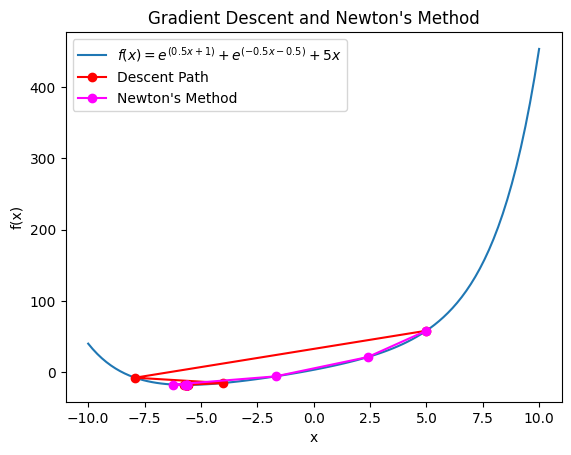

In [7]:
### plotdescents.py

input_x = np.linspace(-10, 10, 100)

def f(x):
    return np.exp(0.5*x + 1) + np.exp(-0.5*x - 0.5) + 5*x
def grad_f(x):
    return 0.5 * np.exp(0.5*x + 1) - 0.5 *np.exp(-0.5*x - 0.5) + 5
def hessian_f(x):
    return 0.25 * np.exp(0.5*x + 1) + 0.25 * np.exp(-0.5*x - 0.5)

output = []
for x in input_x:
    output.append(f(x))
plt.plot(input_x, output, label='$f(x) = e^{(0.5x+1)} + e^{(-0.5x-0.5)} + 5x$')
   
# Gradient Descent
x_init = 5
x_opt, points = gradient_descent(f, grad_f, x_init, alpha=0.1, beta=0.6, epsilon=0.0001, max_iter=1000)
f_opt = f(x_opt)
points_y = [f(x) for x in points]

# Newton's Method
x_opt_newton, points_newton = newton_method(f, grad_f, hessian_f, x_init, alpha=0.1, beta=0.6, epsilon=0.0001, max_iter=1000)
f_opt_newton = f(x_opt_newton)
points_newton_y = [f(x) for x in points_newton]

plt.plot(points, points_y, marker='o', color='red', linestyle='-', label='Descent Path')
plt.plot(points_newton, points_newton_y, marker='o', color='magenta', linestyle='-', label='Newton\'s Method')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent and Newton\'s Method')
plt.show()

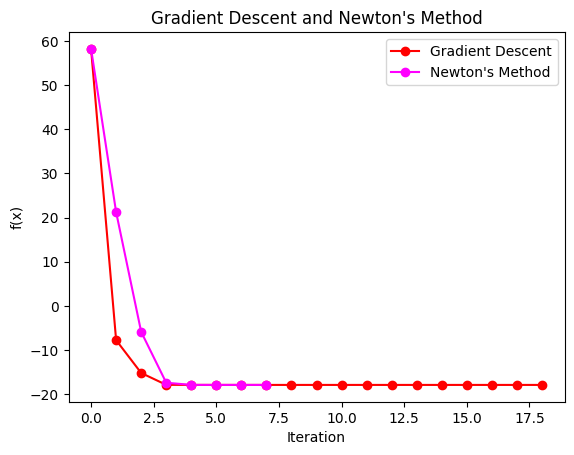

In [8]:
plt.plot(range(len(points_y)), points_y, marker='o', color='red', linestyle='-', label='Gradient Descent')
plt.plot(range(len(points_newton_y)), points_newton_y, marker='o', color='magenta', linestyle='-', label='Newton\'s Method')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Gradient Descent and Newton\'s Method')
plt.show()

It seems that **Newton's Method** converges faster than Gradient Descent.  
1. The function given in the question has few input variables. 
2. The function is continuous and the second-order differential (Hessian matrix) is very easy to obtain.  
3. Using quadratic approximation to find the local minimum of the objective function, the descent direction and step size can be selected more accurately, reducing unnecessary iterations
In this case, Newton's method is very effective.  

# 2. 
Stochastic Gradient Descent: Open the SGDtest.py file included in HW2files.zip. Here you’ll see that a function fsum(x) has been defined as a sum of functions $fi(x,i)$ for  $i = 1, ..., n$ Functions. 
The first and second derivatives of fsum and fi are also given.

a. (10 points) Implement the Stochastic Gradient Descent (SGD) algorithm as a separate file sgd.py(submit this in your zip file).   
You can call your algorithm from SGDtest.py to test it. Set the parameters in the following way:
• Set the step size t = 1. It’s OK to use this large step size for this problem because $∇fi$ is very small.
• Run the algorithm for 1000 iterations (this is the termination condition).
• Choose one random $∇fi$ per iteration.
• Start at $x^{(0)} = −5$.

Time:  0.024916887283325195 for batch size 1


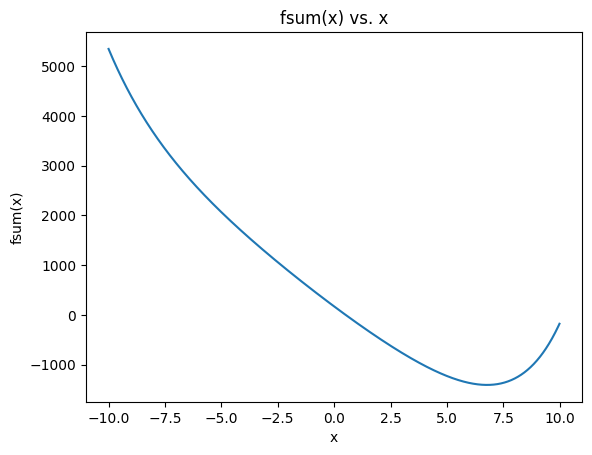

In [17]:
### sgd.py

from SGDtest import fi, fsum, fiprime, fsumprime, fiprimeprime,fsumprimeprime
maxi = 10000

def sgd(x_init, fiprime, t=1, maxi=10000, batch_size=16, iterations=1000):
    x = x_init
    points = [x]
    for i in range(iterations):
        # choose one random ∇fi per iteration
        indices = np.random.randint(1, maxi, size=batch_size)
        grads = [fiprime(x, j) for j in indices]
        grad = np.mean(grads, axis=0)
        delta_x = -t * grad  # negative gradient direction
        
        # update x
        x = x + delta_x
        points.append(x)
        
        # check stopping condition
        if np.linalg.norm(grads) < 0.0001:
            break
    
    return x, points
start = time.time()
batch_size = 1
x, points = sgd(-5, fiprime, t=1, maxi=maxi, batch_size= batch_size, iterations=1000)
end = time.time()
print("Time: ", end - start, 'for batch size', batch_size)

# show the plot of fsum(x) vs. x
xvals = np.arange(-10, 10, 0.01)  # Grid of 0.01 spacing from -10 to 10
yvals = fsum(xvals)  # Evaluate function on xvals
plt.figure()
plt.plot(xvals, yvals)  # Create line plot with yvals against xvals
plt.xlabel('x')
plt.ylabel('fsum(x)')
plt.title('fsum(x) vs. x')
plt.show()

b. (10 points) Create a plot showing $fsum(x^{(i)})$ vs. i and insert it in the pdf and include the code to generate the plot as plot sgd.py in your zip. 
Note that you should not evaluate fsum within the SGD loop because this will be very slow. 
Instead, store the $x^{(i)}s$ you produce and evaluate $fsum$ after you’re done running the algorithm. 
Is $fsum(x{(i)})$ always decreasing? Explain why or why not.

the optimum is at: 6.697615068095549 with fsum(x) = -1404.821629237732


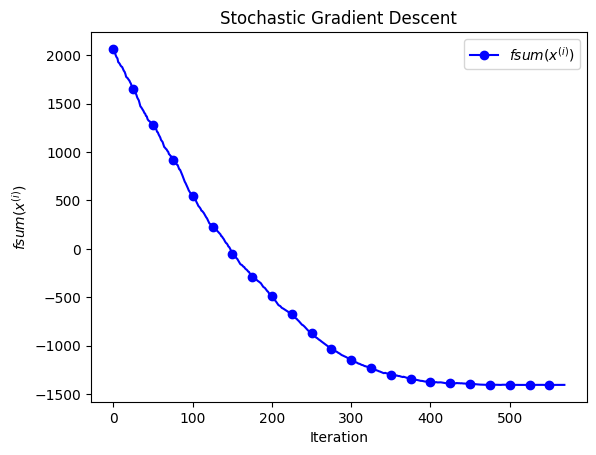

In [10]:
# plot fsum(x) vs. i
points_y = [fsum(x) for x in points]
print("the optimum is at:",x, "with fsum(x) =", fsum(x))
plt.plot(range(len(points_y)), points_y, marker='o', color='blue', linestyle='-', label='$fsum(x^{(i)})$', markevery=25)

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('$fsum(x^{(i)})$')
plt.title('Stochastic Gradient Descent')
plt.show()

The $fsum(x^{(i)})$ is not always decreasing. Especially for large steps size like t = 1. 
In the figure，we can see that the $fsum(x^{(i)})$ increases in approximately 700-th iteration, and then decrease. It shows a kind of fluctuation.
This is because the algorithm randomly selects one of the gradient of the function to approximate the entire gradient at each iteration, which will cause the $fsum(x^{(i)})$ to fluctuate.

c. (10 points) Run SGD 30 times and compute the mean and variance of the resulting $fsum(x^∗)$.
Run SGD with 750 iterations 30 times and compare the resulting mean and variance to what you got with 1000 iterations. Explain the results.

In [11]:
# Run SGD with 1000 iterations 30 times 
maxi = 10000
batch_size = 1
opt_values = []
for _ in range(30):
    x, points = sgd(-5, fiprime, t=1, maxi=maxi, batch_size= batch_size, iterations=1000)
    opt_values.append(fsum(x))
var_1000 = np.var(opt_values)
print("The Variance with 1000 iterations: ", var_1000)
mean_1000 = np.mean(opt_values)
print("The Mean with 1000 iterations: ", mean_1000)

# Run SGD with 750 iterations 30 times 
opt_values_750 = []
for _ in range(30):
    x, points = sgd(-5, fiprime, t=1, maxi=maxi, batch_size= batch_size, iterations=750)
    opt_values_750.append(fsum(x))
var_750 = np.var(opt_values_750)
print("The Variance with 750 iterations: ", var_750)
mean_750 = np.mean(opt_values_750)
print("The Mean with 750 iterations: ", mean_750)

The Variance with 1000 iterations:  2574.186822467361
The Mean with 1000 iterations:  -1379.9352323645141
The Variance with 750 iterations:  877.7738791074528
The Mean with 750 iterations:  -1393.6513065530203


In the plot of problem b, we can see that the $fsum(x^{(i)})$ is convergent to a minimum value after approximately 600 iterations. 
so the results with 1000 iterations has not significant difference with 750 iterations. 

d. Now we will compare SGD with 1000 iterations to Gradient Descent and Newton’s Method in terms of computation time. Use $x^{(0)} = −5$ and $ε = 0.0001$ for both Gradient Descent and Newton’s Method.   
To time how long an algorithm takes, see the timing code in SGDtest.py.
i. (10 points) Put the runtimes you get for the three algorithms in your pdf. Explain your results, i.e. why are you getting the order of times you get here.
ii. (5 points) Compare the three algorithms in terms of $fsum(x^∗)$. Which is the best and which is the worst? Explain why and explain if the difference is significant.

In [12]:
maxi = 10000  # this is the number of functions
x_init = -5

# Gradient Descent
start_gd = time.time()
x_opt, points = gradient_descent(fsum, fsumprime, x_init, alpha=0.3, beta=0.8, epsilon=0.0001, max_iter=1000)
end_gd = time.time()

# Newton's Method
start_NM = time.time()
x_opt_newton, points_newton = newton_method(fsum, fsumprime, fsumprimeprime, x_init, alpha=0.3, beta=0.8, epsilon=0.0001, max_iter=1000)
end_NM = time.time()

# SGD
start_SGD = time.time()
batch_size = 1
x, sgd_points = sgd(x_init, fiprime, t=1, maxi=maxi, batch_size= batch_size, iterations=1000)
end_SGD = time.time()

print("Time for Gradient Descent: ", end_gd - start_gd)
print("Time for Newton's Method: ", end_NM - start_NM)
print("Time for SGD: ", end_SGD - start_SGD)
print('-------------------------------------------------')
print("The optimal value of fsum(x) for Gradient Descent is:", fsum(x_opt), 'at', x_opt)
print("The optimal value of fsum(x) for Newton's Method is:", fsum(x_opt_newton), 'at', x_opt_newton)
print("The optimal value of fsum(x) for SGD is:", fsum(x), 'at', x)

Time for Gradient Descent:  5.591187238693237
Time for Newton's Method:  0.33180904388427734
Time for SGD:  0.01138615608215332
-------------------------------------------------
The optimal value of fsum(x) for Gradient Descent is: -1405.2670409900593 at 6.776993302639244
The optimal value of fsum(x) for Newton's Method is: -1405.2670409900618 at 6.776993532883339
The optimal value of fsum(x) for SGD is: -1402.732452887678 at 6.962853484826434


**The results show that SGD is much faster than Gradient Descent and Newton's Method**  
The SGD method randomly selects a part of the gradient of the function to approximate the entire gradient at each iteration, which greatly reduces the time consumption of calculation. Especially when n is relatively large (the number of functions in this question is 10000)    
 Newton's Method converges quickly to the optimal solution because it uses both the gradient and the Hessian  of the objective function to guide its search.Each iteration is computationally expensive, but the method requires fewer iterations to find the optimum, which results in a moderate total runtime.    
 Gradient descent updates the solution in the direction of the negative gradient. Although each iteration is relatively simple, it takes many iterations to converge.  

**The optimal value of $fsum(x)$ for Newton's Method is grater than that of Gradient Descent and SGD.**  
Newton's Method is the best in terms of both accuracy and runtime. It converges to the optimal value very quickly and achieves an objective value very close to that of Gradient Descent.  
Gradient Descent finds a solution very close to Newton's Method, but takes significantly longer to converge due to its reliance on first-order information alone.    
SGD has a large error. This inaccuracy is mainly caused by choosing too small a gradient sample (in this case batch size = 1), which results in a large variance in the update.  

3. Implementing the Barrier Method: Before you start writing code, you will need to figure out some of the equations you will need.   
The solutions to the following should be included in the pdf you submit:

a. (5 points) Write down the objective function used in the centering problem of the log barrier method (in the general case). Define the variables used in this function.
* the original problem:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &f_0(x) \\ 
\text{subject to} \quad &f_i(x) \leq 0, i = 1,...,m \\ 
\quad &Ax = b \\ 
\end{aligned}$$

Objective function:
$f(x)$ is the objective function to be maximized.
Inequality constraints:
$f_i(x) \leq 0, i = 1,...,m$ are the inequality constraints.
Equality constraints:
$Ax = b$ is a linear equality constraint.

* the centering problem of the log barrier method:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &f_0(x) + \sum_{i=1}^m \ -\frac{1}{t} \log(-f_i(x)) \\ 
\text{subject to} \quad &Ax = b \\\\  
\end{aligned}$$

we set $\phi(x) = -\frac{1}{t} \log(-f_i(x))$ and we will call it as the log barrier function.
Parameter:
$t$: controls the penalty of the barrier function.
New Objective function:
$f_0(x) + \sum_{i=1}^m \ -\frac{1}{t} \log(-f_i(x))$ convert an inequality constraint into an equality constraint for a smooth function optimization problem

b. (5 points) Write down the function for (a) in the case of a linear program. Define the variables used in this function.
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &c^Tx \\ 
\text{subject to} \quad &Gx \leq h \\ 
&Ax = b \\ 
\end{aligned}$$

$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &t c^Tx - \sum_{i=1}^m \log(h_i - g_i^Tx) \\ 
\text{subject to} \quad &Ax = b \\\\  
\end{aligned}$$

Objective function:
$Gx \leq h $ is a linear function that needs to be maximized.
Inequality constraints:
$Gx \leq h $, where $G$ is an $m×n$ matrix,
$h$ is an m-dimensional vector, representing m inequality constraints.
Equality constraints: $Ax=b$, where
$A$ is a $p×n$ matrix,
$b$ is a p-dimensional vector.
Constructed objective function:
$t c^Tx - \sum_{i=1}^m \log(h_i - g_i^Tx)$
$t$ is a positive parameter used to adjust the weight of the linear objective. As the iteration progresses, $t$ increases.
$\sum_{i=1}^m \log(h_i - g_i^Tx)$ is the log barrier function.

c. (5 points) Write down the derivative of the function for (b).
$$\frac{\delta \text{(object function)}}{\delta x} =\quad t c - \sum_{i=1}^m \frac{1}{(h_i - g_i^T x)}$$


d. (5 points) Write down the second derivative of the function for (b).
$$ \quad  \sum_{i=1}^m  \frac{g_i^T g_i}{(h_i - g_i^T x)^2} $$

e. (5 points) Write down the duality gap for the barrier method with log barrier functions. 
It should be in terms of numplanes, the number of hyperplanes, and t, the optimization “force” increment.

The duality gap for the barrier method with log barrier functions is:  

$$\text{gap} = \frac{\text{numplanes}}{t}$$

f. (35 points) Include your barrier.py in your zip file. We will test your code on a different problem to verify that it is correct (i.e. by changing the A,b, and c matrices). 
Do not assume the number of hyperplanes is constant. The problem will still be 2-dimensional. 
If your code does not run or crashes, you will receive 0 points for this part of the problem.

OUTER loop iteration 1: Number of INNER loop iterations: 2

OUTER loop iteration 2: Number of INNER loop iterations: 2

OUTER loop iteration 3: Number of INNER loop iterations: 2

OUTER loop iteration 4: Number of INNER loop iterations: 2

OUTER loop iteration 5: Number of INNER loop iterations: 2

OUTER loop iteration 6: Number of INNER loop iterations: 3

OUTER loop iteration 7: Number of INNER loop iterations: 3

OUTER loop iteration 8: Number of INNER loop iterations: 3

OUTER loop iteration 9: Number of INNER loop iterations: 3

OUTER loop iteration 10: Number of INNER loop iterations: 3

OUTER loop iteration 11: Number of INNER loop iterations: 3

OUTER loop iteration 12: Number of INNER loop iterations: 4

OUTER loop iteration 13: Number of INNER loop iterations: 4

OUTER loop iteration 14: Number of INNER loop iterations: 4

OUTER loop iteration 15: Number of INNER loop iterations: 4

OUTER loop iteration 16: Number of INNER loop iterations: 4

OUTER loop iteration 17: Number o

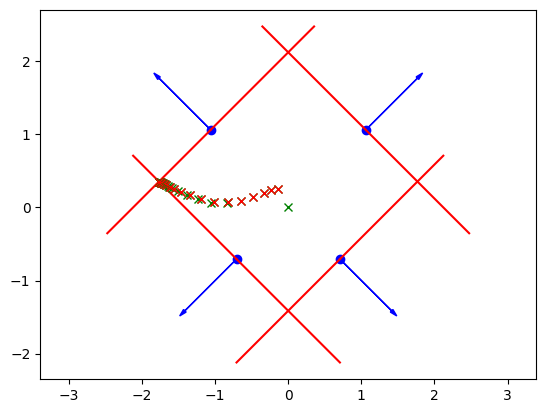

In [13]:
%run barrier.py

g. (10 points) Now it’s time to verify your solution using a state-of-the art solver. 
Write a script using cvxpy to solve the same problem. You only need to give it the proper A,b, and c matrices ,and it will do the rest. 
Include your code as lptest.py in your zip. 
When we run this code it should only print out the solution, which should be the same as what you found in barrier.py
(with accuracy up to the 2nd decimal place). See here for an example LP in cvxpy.

In [14]:
import cvxpy as cp

# Generate a random non-trivial linear program.
A = np.array([
        [0.7071, 0.7071],
        [-0.7071, 0.7071],
        [0.7071, -0.7071],
        [-0.7071, -0.7071]])
b = np.array([1.5, 1.5, 1, 1]).T
c = np.array([2,1]).T

# Define and solve the CVXPY problem.
x = cp.Variable(2)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -3.1820110305652545
A solution x is
[-1.76778391  0.35355678]
A dual solution is
[8.80174861e-11 7.07113563e-01 1.91363545e-10 2.12134069e+00]


4. Optimal control using a QP: The script carqp.py simulates driving a robot with simplified car-like dynamics. We will formulate the controller for this car as a quadratic program (QP).

a. (15 points) The car has discrete-time dynamics $x_(t+1) = f (x_t, u_t)$, where $x_t$ is the state at time $t$ and $u_t$ is the control command applied at time $t$. The state is the pose of the car $[x, y, θ]^T$ and the control is $[speed, turn]^T$. The dynamics function is not convex. 
So, the first step to controlling the car with a QP is to approximate the true dynamics with a linearization. We will NOT assume that the dynamics function is known in closed form, so we must use numerical differentiation to linearize the dynamics. The linearized dynamics are of the form
$$x_{t+1} = f(x_r, u_r) + A(x_r, u_r)[x_t - x_r] + B(x_r, u_r)[u_t - u_r]$$
where $ A \in \mathbb{R}^{3 \times 3} $ and $ B \in \mathbb{R}^{3 \times 2}$. A and B are not constant matrices, rather they are computed for some reference state xr and control ur (they are a local approximation to the dynamics). Since the dynamics takes as input two vectors ($x_t$ and $u_t$), it is convenient to concatenate them to make the linearization code easier to write:
$$A(x_r, u_r)[x_t - x_r] + B(x_r, u_r)[u_t - u_r] = [A(x_r, u_r) B(x_r, u_r)]\begin{pmatrix}
x_t-x_r \\
u_t-u_r
\end{pmatrix}$$
In fact, $[A(xr, ur) B(xr, ur)]$ is the Jacobian of f evaluated at $x_r$, $u_r$. In carqp.py, you will see the function linearize dynamics numerically, which takes as input $x_r$, $u_r$, $h$, and a function pointer to the true dynamics. Implement Newton’s difference quotient to compute the Jacobian.
Do not compute the derivative analytically, this will receive no credit. Your code should go in the section of linearize dynamics numerically denoted by ###YOUR CODE HERE###.
To test your implementation run python carqp.py test linearization, which will print out the A and B matrices and show the prediction error on a test example. A correct implementation will produce an error $< 10^{−10}$ for this example. We will confirm this when we run your code.

Testing linearization of dynamics for
  Current state:
    [0.2 0.1 0.4]
  Reference control:
    [0. 0.]
  h:
    0.01
A:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
B:
 [[0.0921061  0.        ]
 [0.03894183 0.        ]
 [0.         0.1       ]]

Test control:
    [0.1 0.2]

Predicted state using linearized dynamics Ax + Bu:
   [0.20921061 0.10389418 0.42      ]
True state (using true dynamics):
   [0.20921061 0.10389418 0.42      ]
Prediction error:
   6.206335383118183e-17


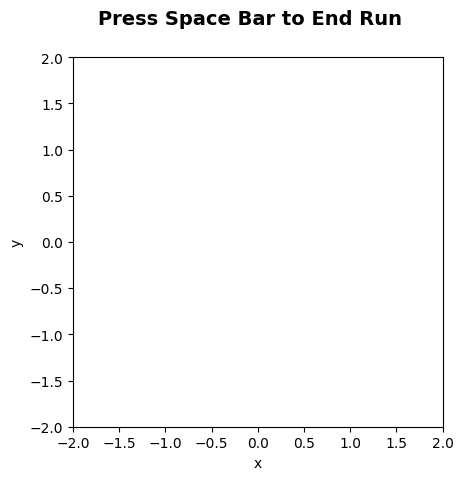

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx
import os.path
import time
import sys

sys.argv = ['carqp.py', 'test_linearization']
__file__ = 'carqp.py'

SCRIPT_DIR = os.path.abspath(os.path.dirname(__file__))


class StateIndices:
    X = 0
    Y = 1
    HEADING = 2


class ControlIndices:
    SPEED = 0
    TURN = 1


class CarEnvironment:
    """Simplified Dubin's car environment"""

    def __init__(self):
        # plotting
        self.fig = plt.gcf()
        self.ax = plt.gca()
        self.ax.set_xlim(-2, 2)
        self.ax.set_ylim(-2, 2)
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_aspect('equal')
        self.car_artists = {}

        self.fig.suptitle('Press Space Bar to End Run', fontsize=14, fontweight='bold')

        # set up the space bar call back for ending early
        def onpress(event):
            global bKeepRunning

            if event.key == ' ':
                if bKeepRunning == False:
                    # plot is already stopped, exit
                    exit()
                else:
                    bKeepRunning = False
                    print('Ending the run')
                    # self.fig.suptitle('Press Space Bar to Close Program', fontsize=14, fontweight='bold', color='red')

        self.fig.canvas.mpl_connect('key_press_event', onpress)

        plt.ion()
        #plt.show()
        self.state_history = []

    def visualize_state(self, state, name='current', color=(0, 0, 0), plot_trail=True):
        """Draw a state"""
        car_artists = self.car_artists.get(name, [])
        for artist in car_artists:
            artist.remove()
        car_artists = []

        if plot_trail and name == 'current':
            self.state_history.append(state)
            xs, ys, _ = zip(*self.state_history[-2:])
            self.ax.plot(xs, ys, c=(0, 0, 1), linestyle='dashed')

        # represent car with an arrow pointing along its heading
        arrow_length = 0.1
        c = np.cos(state[StateIndices.HEADING])
        s = np.sin(state[StateIndices.HEADING])
        dx = arrow_length * c
        dy = arrow_length * s
        car_artists.append(
            plt.arrow(state[StateIndices.X], state[StateIndices.Y], dx, dy, width=arrow_length / 10, ec=color, fc=color,
                      label=name))

        # plot rectangle instead of point to represent robot
        # car_artists.append(plt.scatter(state[StateIndices.X], state[StateIndices.Y], color=c, label=name))
        h = 0.1
        w = 0.15
        offset = np.array([-w / 2, -h / 2])
        rot = np.array([[c, -s],
                        [s, c]])
        offset = rot @ offset
        car_artists.append(plt.Rectangle((state[StateIndices.X] + offset[0],
                                          state[StateIndices.Y] + offset[1]), w, h,
                                         angle=state[StateIndices.HEADING] * 180 / np.pi,
                                         ec=color, fc=color, fill=False))
        self.ax.add_artist(car_artists[-1])

        self.car_artists[name] = car_artists
        if name == 'current':
            self.ax.legend()
        plt.pause(0.05)

    def save_plot(self, filename):
        plt.savefig(filename)

    def true_dynamics(self, state, control):
        """x_{t+1} = f(x_t, u_t) true dynamics function of the car"""
        """The true dynamics should be used as a 'black box' to simulate the car motion"""
        t = 0.1

        next_state = np.copy(state)
        next_state[StateIndices.X] += control[ControlIndices.SPEED] * t * np.cos(state[StateIndices.HEADING])
        next_state[StateIndices.Y] += control[ControlIndices.SPEED] * t * np.sin(state[StateIndices.HEADING])
        next_state[StateIndices.HEADING] += t * control[ControlIndices.TURN]
        return next_state


def linearize_dynamics_numerically(x_r, u_r, h, true_dynamics):
    """Numerically linearize car dynamics around reference state x_r and control u_r with parameter h
    Linear dynamics is of the form  x_{t+1} = Ax_t + Bu_t
    This function returns A, B

    In this problem we recommend using finite differences; this should be the last resort in practice since
    it is the least accurate, but the most robust since it can handle black box functions.
    You should use the true dynamics as a 'black box', i.e. your method should be able to handle any 
    true_dynamics function given to it
    """

    # wrapper around function to have it take a single vector as input
    def f(combined_input):
        x = combined_input[:3]
        u = combined_input[3:]
        return true_dynamics(x, u)

    # combined reference point
    xu_r = np.r_[x_r, u_r]
    # function evaluated at reference point
    f_r = f(xu_r)

    m = f_r.shape[0]
    n = xu_r.shape[0]
    # Jacobian (m, n) where m is the output dimension, n is the input dimension
    Jacobian = np.zeros((m, n))

    # Implement Newton's difference quotient using h
    for i in range(n):
        # Create a small perturbation vector
        perturbation = np.zeros(n)
        perturbation[i] = h

        # Evaluate the function at the perturbed input
        f_perturbed = f(xu_r + perturbation)

        # Compute the difference quotient for the i-th partial derivative
        Jacobian[:, i] = (f_perturbed - f_r) / h

    A = Jacobian[:, :3]  # the left half of the Jacobian is A （3*3）
    B = Jacobian[:, 3:]  # the right half of the Jacobian is B（3*2）
    return A, B


def linearize_dynamics(x_r, u_r, t):
    """Linearize car dynamics around reference state and control with sampling time t"""
    A = np.array([[1, 0, - u_r[ControlIndices.SPEED] * np.sin(x_r[StateIndices.HEADING]) * t],
                  [0, 1, u_r[ControlIndices.SPEED] * np.cos(x_r[StateIndices.HEADING]) * t],
                  [0, 0, 1]])
    B = np.array([[np.cos(x_r[StateIndices.HEADING]) * t, 0],
                  [np.sin(x_r[StateIndices.HEADING]) * t, 0],
                  [0, t]])
    return A, B


def optimize_single_action(goal_state, current_state, reference_control, A, B, speed_limit, turn_limit):
    """Optimize to get the best single step action under our linear dynamics

    :param A state dynamics matrix
    :param B control dynamics matrix
    :param speed_limit (min_speed, max_speed) for the control dimension; boundaries are allowed
    :param turn_limit (min_turn, max_turn) where the boundaries are allowed
    """

    # single step control
    # define a cvx.Variable for the control
    control = cvx.Variable(B.shape[1])

    # define the control constraints and the objective, then use cvxpy to solve the QP
    # Predicted next state using the linearized dynamics
    next_state = A @ current_state + B @ control

    # Define the objective: minimize the distance to the goal state
    objective = cvx.Minimize(cvx.norm(goal_state - next_state, 2))

    # Define the constraints for the control inputs
    constraints = [
        control[0] >= speed_limit[0],  # Speed lower bound
        control[0] <= speed_limit[1],  # Speed upper bound
        control[1] >= turn_limit[0],  # Turn rate lower bound
        control[1] <= turn_limit[1]  # Turn rate upper bound
    ]

    # Define and solve the optimization problem
    problem = cvx.Problem(objective, constraints)
    problem.solve()

    if control.value is not None:
        return control.value
    else:
        # control has not been computed
        return np.zeros(B.shape[1])


def run_problem(probname, start_state, goal_state,
                h_in=0.1, reference_control=np.array([0.5, 0.]), speed_limit=(0, 1), turn_limit=(-2, 2)):
    global bKeepRunning

    car = CarEnvironment()
    car.visualize_state(goal_state, name='goal', color=(0, 0.7, 0), plot_trail=False)

    prediction_error = []

    state = start_state.copy()
    car.visualize_state(state)
    tol = 1e-10
    bKeepRunning = True

    MaxSteps = 40

    for i in range(MaxSteps):
        if not bKeepRunning:
            break
        # A, B = linearize_dynamics(state, reference_control, t=t)
        A, B = linearize_dynamics_numerically(state, reference_control, h=h_in, true_dynamics=car.true_dynamics)
        control = optimize_single_action(goal_state, state, reference_control, A, B, speed_limit, turn_limit)

        # use our linearized dynamics to predict next state under this control
        # predicted state should be state + (A @ state-state) + (B @ (control-reference_control)), because we linearize about the current state, which we assume is an equilibrium point and state - state = 0, we have:
        predicted_state = state + B @ (control - reference_control)

        # check that control is within bounds
        if not (speed_limit[0] - tol < control[ControlIndices.SPEED] < speed_limit[1] + tol
                and turn_limit[0] - tol < control[ControlIndices.TURN] < turn_limit[1] + tol):
            raise RuntimeError(
                "Control is out of bounds; optimization constraints may be incorrectly set"
                "\ncontrol: {}\nlimits: {} and {}".format(control, speed_limit, turn_limit))

        state = car.true_dynamics(state, control)
        prediction_error.append(state - predicted_state)
        # print(np.sum((goal_state - predicted_state)**2))
        car.visualize_state(predicted_state, name='predicted', color=(0.7, 0, 0), plot_trail=False)
        car.visualize_state(state)

        # if control is close to 0, end
        if np.linalg.norm(control) < tol:
            break

    bKeepRunning = False
    car.fig.suptitle('Press Space Bar to Close Program', fontsize=14, fontweight='bold', color='red')
    # car.save_plot(os.path.join(SCRIPT_DIR, "{}.png".format(name)))

    print('Distance to goal:\n', np.linalg.norm((goal_state - state)))

    # prediction_error = np.stack(prediction_error)
    # print("max prediction error: {}".format(np.max(prediction_error)))


if __name__ == "__main__":

    args = sys.argv[1:]
    if len(args) == 0:
        print("Specify what to run:")
        print("  'python3 carqp.py test_linearization' will test the numerical linearization method")
        print("  'python3 carqp.py run_test [test index]' will run the simulation for a specific test index (0-2)")
        exit()

    if args[0] == 'test_linearization':
        car = CarEnvironment()
        current_state = np.array([0.2, 0.1, 0.4])
        reference_control = np.array([0., 0.])
        test_control = np.array([0.1, 0.2])
        h = 0.01

        print('Testing linearization of dynamics for')
        print('  Current state:')
        print('   ', current_state)
        print('  Reference control:')
        print('   ', reference_control)
        print('  h:')
        print('   ', h)

        A, B = linearize_dynamics_numerically(current_state, reference_control, h=h, true_dynamics=car.true_dynamics)
        print('A:\n', A)
        print('B:\n', B)

        print('\nTest control:')
        print('   ', test_control)

        # get prediction
        predicted_nextx = current_state.T + A @ (current_state.T - current_state.T) + B @ (
                test_control.T - reference_control.T)

        # get true next state
        true_nextx = car.true_dynamics(current_state, test_control)

        print('\nPredicted state using linearized dynamics Ax + Bu:')
        print('  ', predicted_nextx)
        print('True state (using true dynamics):')
        print('  ', true_nextx)
        print('Prediction error:')
        print('  ', np.linalg.norm(predicted_nextx - true_nextx))

        exit()

    elif args[0] == 'run_test':
        try:
            testind = int(args[1])
        except:
            print("ERROR: Test index has not been specified")
            exit()

        # state format is [x, y, theta]
        start_state = np.array([0., 0., 0.])
        goal_states = np.array([[0.6, 0.4, 1],  # test 0
                                [0.7, -0.6, -1],  # test 1
                                [0.8, -0.3, -1.5]])  # test 2

        run_problem(testind, start_state, goal_states[testind], h_in=0.01, reference_control=np.array([0.0, 0.0]))

        # wait until the plot closes 
        plt.show(block=True)


b. (20 points) Now that you have a method to linearize dynamics, we can use a QP to control the robot. The function optimize single action in carqp.py should produce the optimal control command. This function uses the cvxpy optimizer to solve the QP. Your goal is to formulate the constraints and objective function for this QP. Define these in the ###YOUR CODE HERE### block.
The objective is to find a control command $u^∗$ that produces an $x_{t+1}$ which is as close as possible to the goal state, while obeying the constraints defined in the variables speed limit and turn limit. To simplify the problem, we will linearize about the current state $(x_t = x_r)$ and a control of $u_r = [0, 0]$. We will assume that xt is an equilibrium point, i.e. $x_t = f(x_t, [0, 0])$. The dynamics then become:
$$x_{t+1} = x_t + A(x_r, u_r)[x_t - x_r] + B(x_r, u_r)[u_t - u_r] = x_t + B(x_r, u_r)[u_t - u_r]$$
You will need to use these dynamics as part of your objective function.
cvxpy is very flexible, so your constraints and objective function do not have to be in standard form. Note that this function uses linearize dynamics numerically, so make sure to complete part (a) before starting this part.

In [16]:
#see codes